# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? 

----

## Imports and Data

**TASK: Run the following cells to import libraries and read in data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/CIA_Country_Facts.csv')

## Exploratory Data Analysis

**TASK: Explore the rows and columns of the data as well as the data types of the columns.**

In [4]:
# CODE HERE
df.head()

Country                               Region  Population  \
0        Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1            Albania  EASTERN EUROPE                          3581655   
2            Algeria  NORTHERN AFRICA                        32930091   
6           Anguilla              LATIN AMER. & CARIB           13477   
7  Antigua & Barbuda              LATIN AMER. & CARIB           69108   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
6             102                       132.1                         59.80   
7             443                       156.0                         34.54   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
6          10.76                               21.03              8600.0   
7          -6.15                               19.46             11000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
6          95.0              460.0        0.00       0.00     100.00      2.0   
7          89.0              549.9       18.18       4.55      77.27      2.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
6      14.17       5.34        0.040     0.180    0.780  
7      16.93       5.37        0.038     0.220    0.743

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-n

In [6]:
df.describe().T

count          mean           std  \
Population                          179.0  3.421415e+07  1.317639e+08   
Area (sq. mi.)                      179.0  5.641830e+05  1.395657e+06   
Pop. Density (per sq. mi.)          179.0  2.948050e+02  1.379353e+03   
Coastline (coast/area ratio)        179.0  1.649520e+01  7.397760e+01   
Net migration                       179.0 -2.065363e-01  4.751216e+00   
Infant mortality (per 1000 births)  179.0  3.889816e+01  3.535300e+01   
GDP ($ per capita)                  179.0  9.125698e+03  9.644123e+03   
Literacy (%)                        179.0  8.194413e+01  1.983754e+01   
Phones (per 1000)                   179.0  2.081520e+02  2.101219e+02   
Arable (%)                          179.0  1.400045e+01  1.315240e+01   
Crops (%)                           179.0  4.440838e+00  8.090331e+00   
Other (%)                           179.0  8.155821e+01  1.610375e+01   
Climate                             179.0  2.108939e+00  6.976111e-01   
Birthrate                           179.0  2.306749e+01  1.128721e+01   
Deathrate                           179.0  9.465140e+00  5.210083e+00   
Agriculture                         179.0  1.569050e-01  1.513428e-01   
Industry                            179.0  2.880279e-01  1.403096e-01   
Service                             179.0  5.545084e-01  1.656696e-01   

                                          min           25%          50%  \
Population                          13477.000  1.188580e+06  6940432.000   
Area (sq. mi.)                         28.000  1.991500e+04   118480.000   
Pop. Density (per sq. mi.)              1.800  2.680000e+01       66.900   
Coastline (coast/area ratio)            0.000  9.000000e-02        0.630   
Net migration                         -20.990 -1.315000e+00        0.000   
Infant mortality (per 1000 births)      2.290  9.990000e+00       24.310   
GDP ($ per capita)                    500.000  1.800000e+03     5100.000   
Literacy (%)                           17.600  6.995000e+01       90.900   
Phones (per 1000)                       0.200  2.710000e+01      137.100   
Arable (%)                              0.000  3.675000e+00       10.530   
Crops (%)                               0.000  2.300000e-01        1.030   
Other (%)                              33.330  7.282500e+01       86.070   
Climate                                 1.000  2.000000e+00        2.000   
Birthrate                               7.290  1.389000e+01       20.460   
Deathrate                               2.410  5.795000e+00        7.840   
Agriculture                             0.000  3.900000e-02        0.101   
Industry                                0.032  1.970000e-01        0.274   
Service                                 0.062  4.245000e-01        0.559   

                                             75%           max  
Population                          2.086014e+07  1.313974e+09  
Area (sq. mi.)                      4.964410e+05  9.631420e+06  
Pop. Density (per sq. mi.)          1.647000e+02  1.618300e+04  
Coastline (coast/area ratio)        5.355000e+00  8.706600e+02  
Net migration                       3.950000e-01  2.306000e+01  
Infant mortality (per 1000 births)  6.460500e+01  1.630700e+02  
GDP ($ per capita)                  1.295000e+04  3.780000e+04  
Literacy (%)                        9.780000e+01  1.000000e+02  
Phones (per 1000)                   3.350000e+02  8.980000e+02  
Arable (%)                          2.000000e+01  6.211000e+01  
Crops (%)                           4.600000e+00  4.896000e+01  
Other (%)                           9.481000e+01  1.000000e+02  
Climate                             2.500000e+00  4.000000e+00  
Birthrate                           3.231500e+01  5.073000e+01  
Deathrate                           1.166000e+01  2.974000e+01  
Agriculture                         2.330000e-01  7.690000e-01  
Industry                            3.490000e-01  9.060000e-01  
Service                          

# Exploratory Data Analysis

Let's create some visualizations. Please feel free to expand on these with your own analysis and charts!

**TASK: Create a histogram of the Population column.**

<AxesSubplot:xlabel='Population', ylabel='Count'>

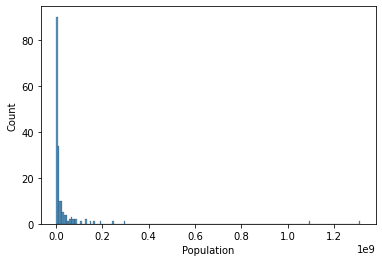

In [7]:
# CODE HERE
#plt.figure(figsize=(12,5),dpi=200)
sns.histplot(data=df, x='Population')

<AxesSubplot:xlabel='Population', ylabel='Count'>

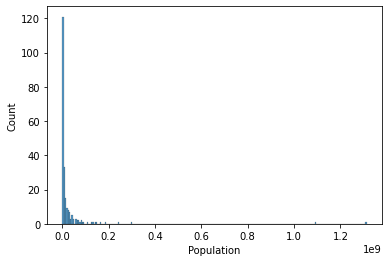

**TASK: You should notice the histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.5 billion people**

<AxesSubplot:xlabel='Population', ylabel='Count'>

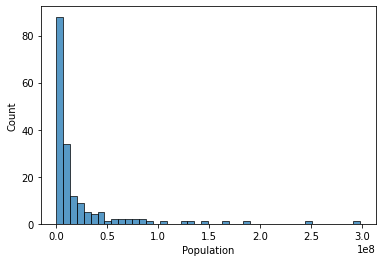

In [8]:
#CODE HERE
dfb = df[df["Population"] < 0.5*10**9]
#plt.figure(figsize=(12,5),dpi=200)
sns.histplot(data=dfb, x='Population')

<AxesSubplot:xlabel='Population', ylabel='Count'>

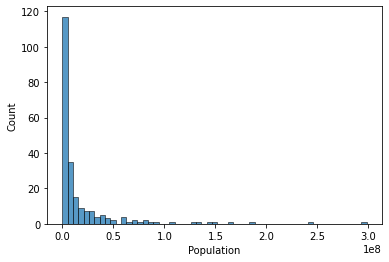

**TASK: Now let's explore GDP and Regions. Create a bar chart showing the mean GDP per Capita per region (recall the black bar represents std).**

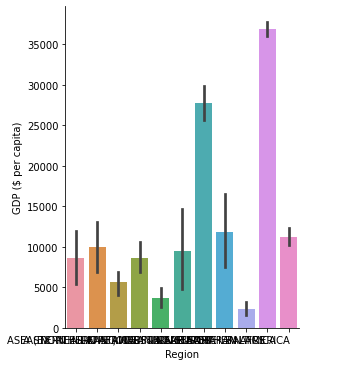

In [9]:
# CODE HERE
sns.catplot(x="Region", y="GDP ($ per capita)", kind="bar", data=df)

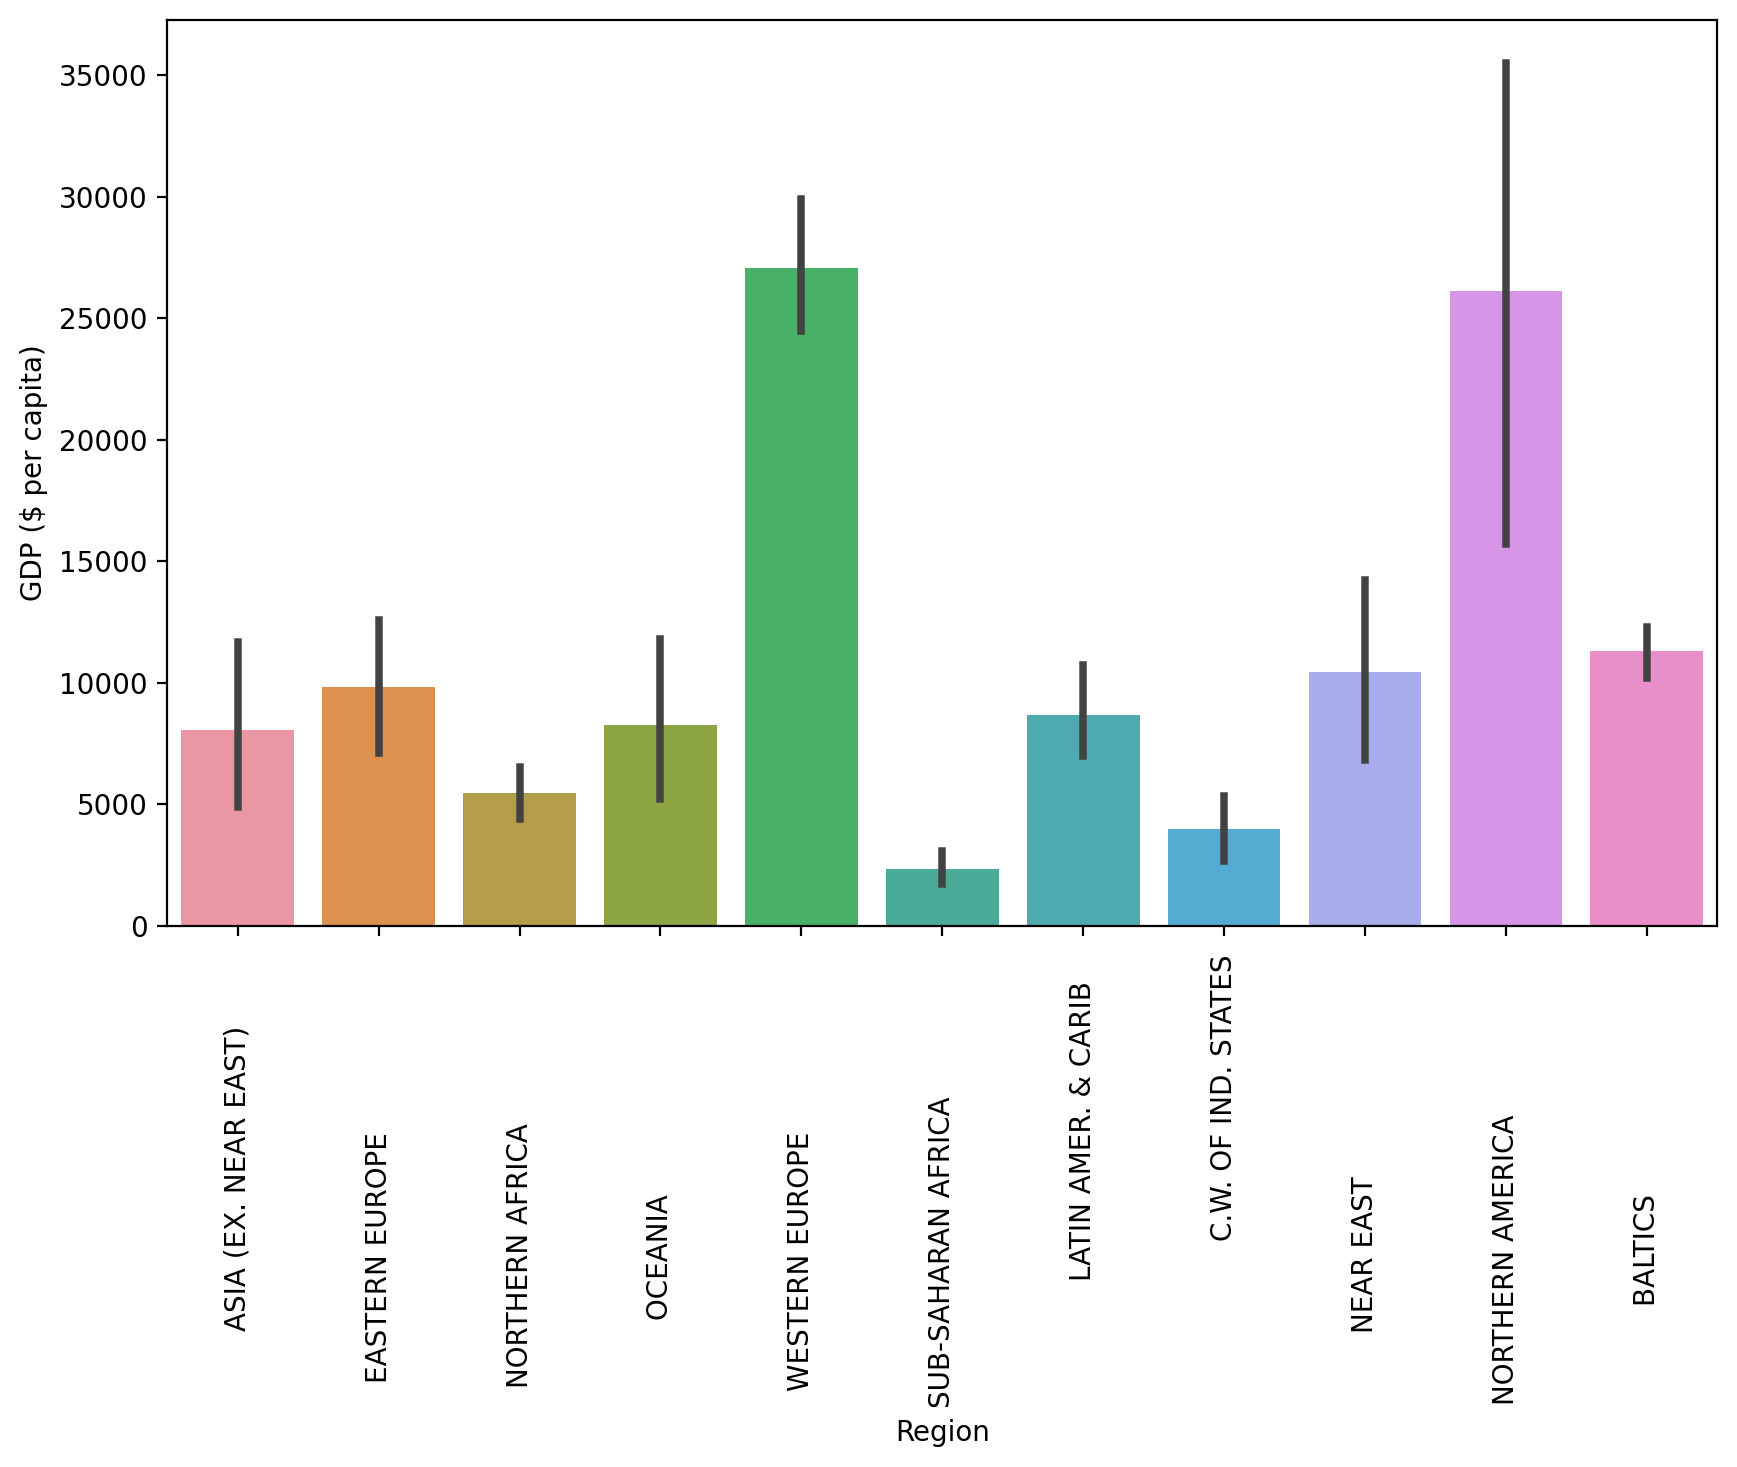

**TASK: Create a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.**

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

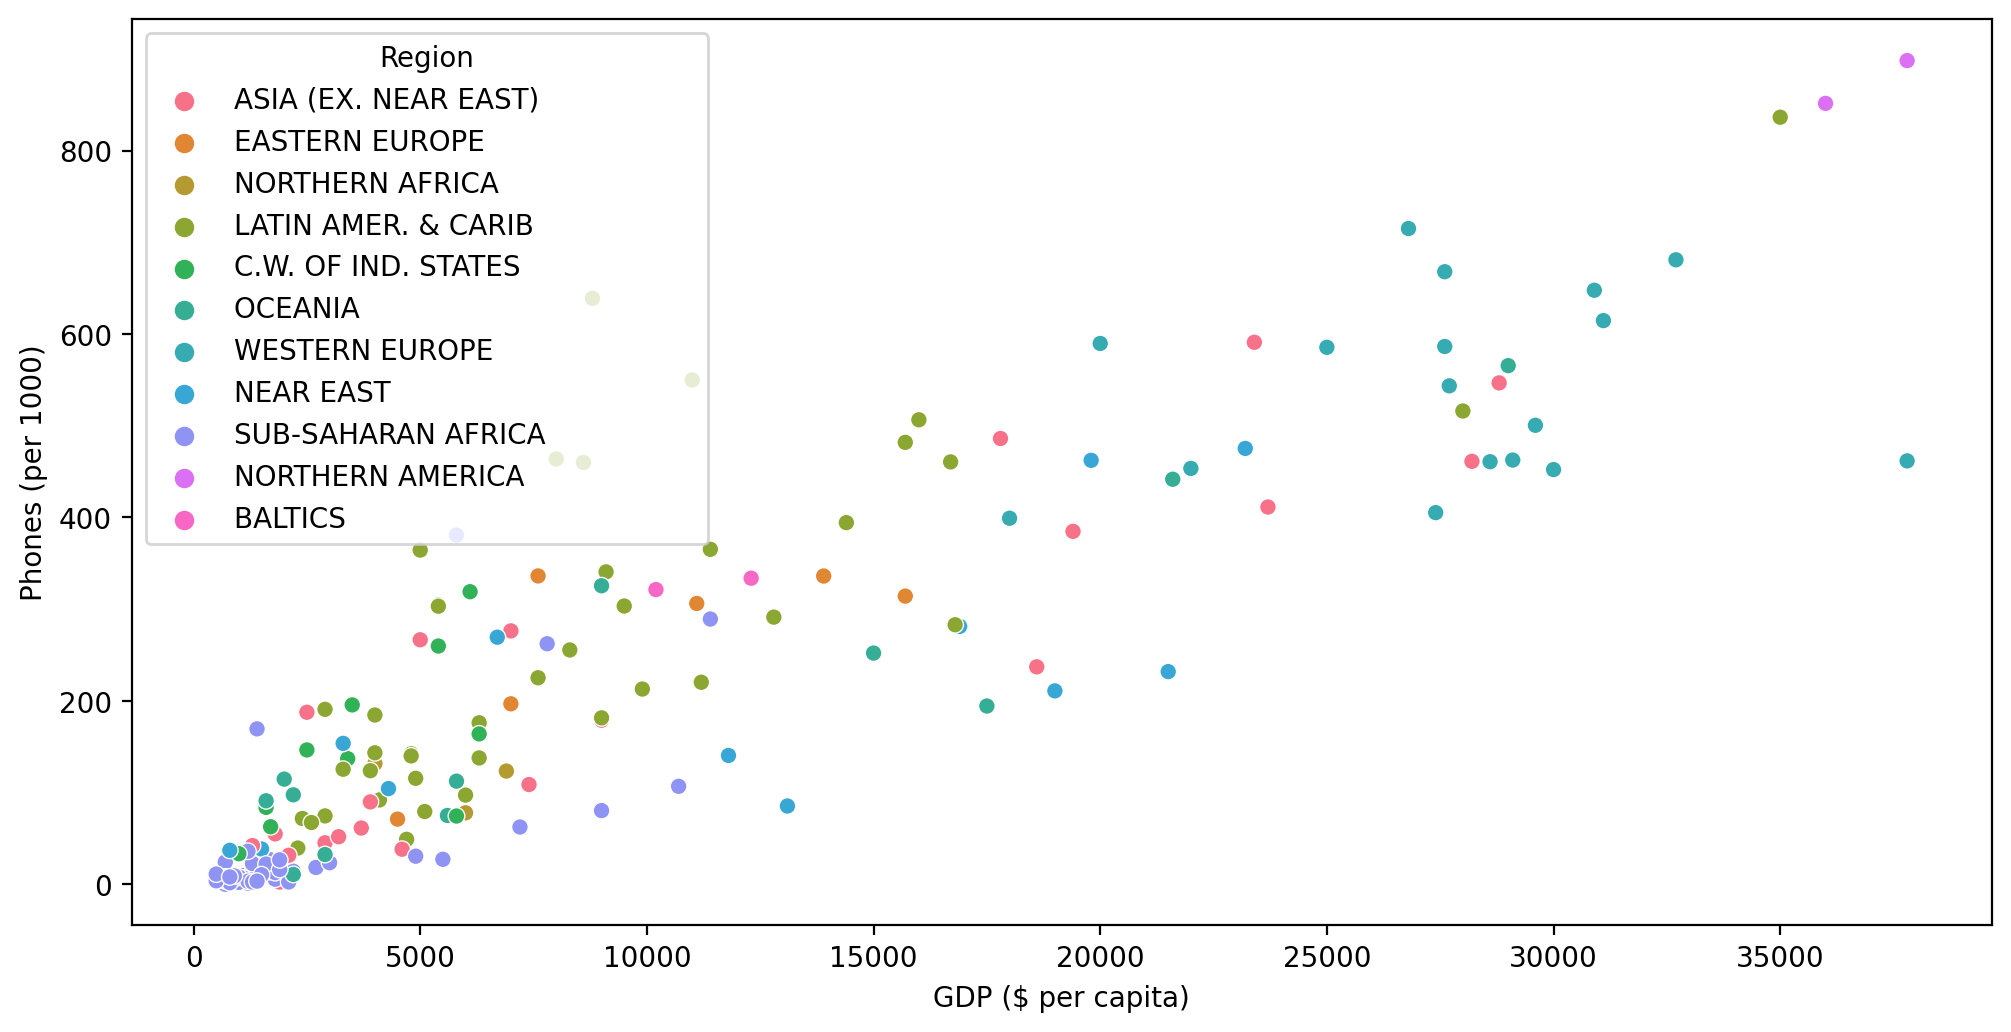

In [11]:
#CODE HERE
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue="Region")

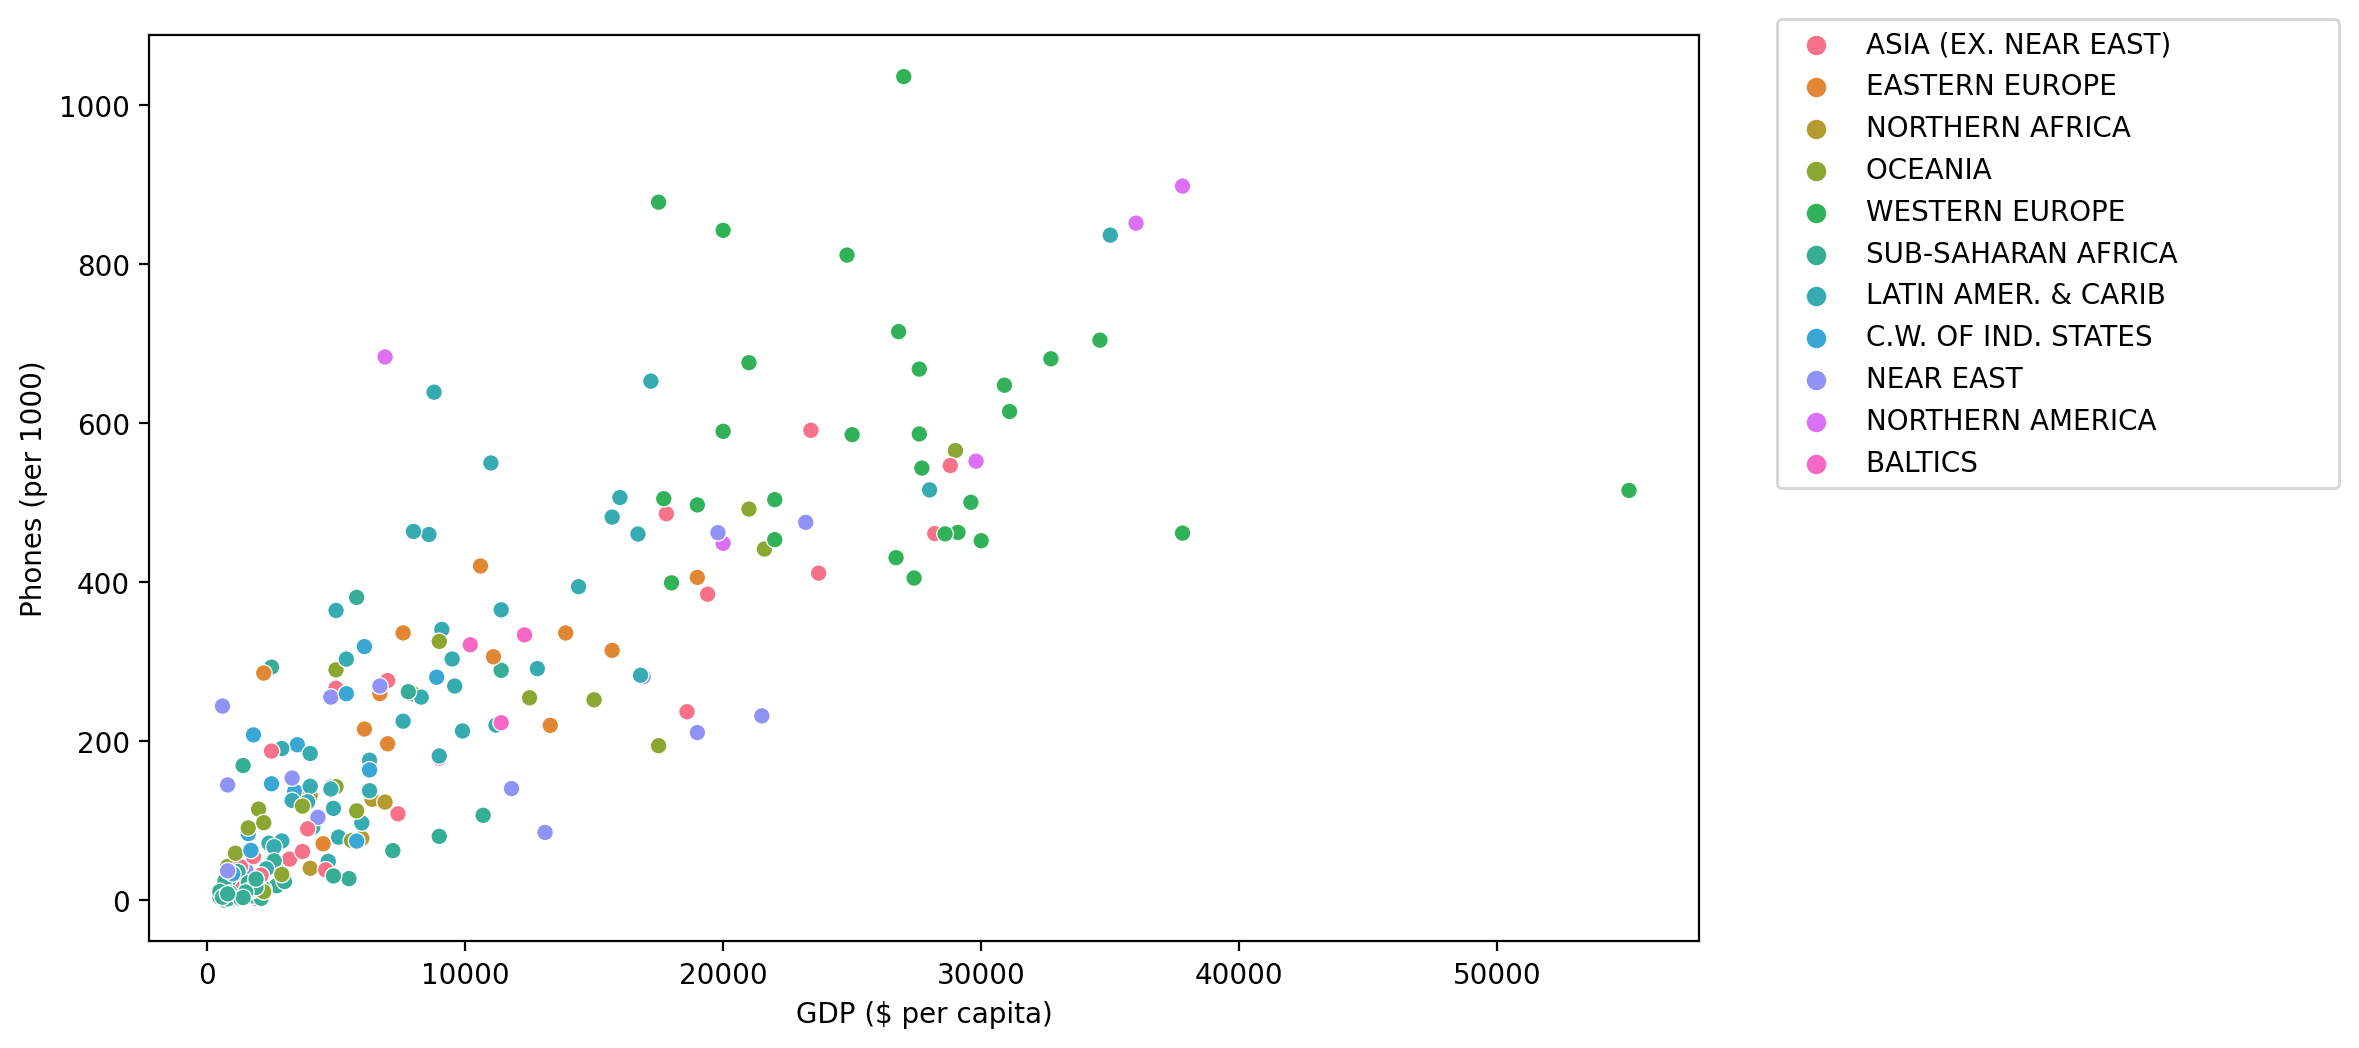

**TASK: Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?**

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

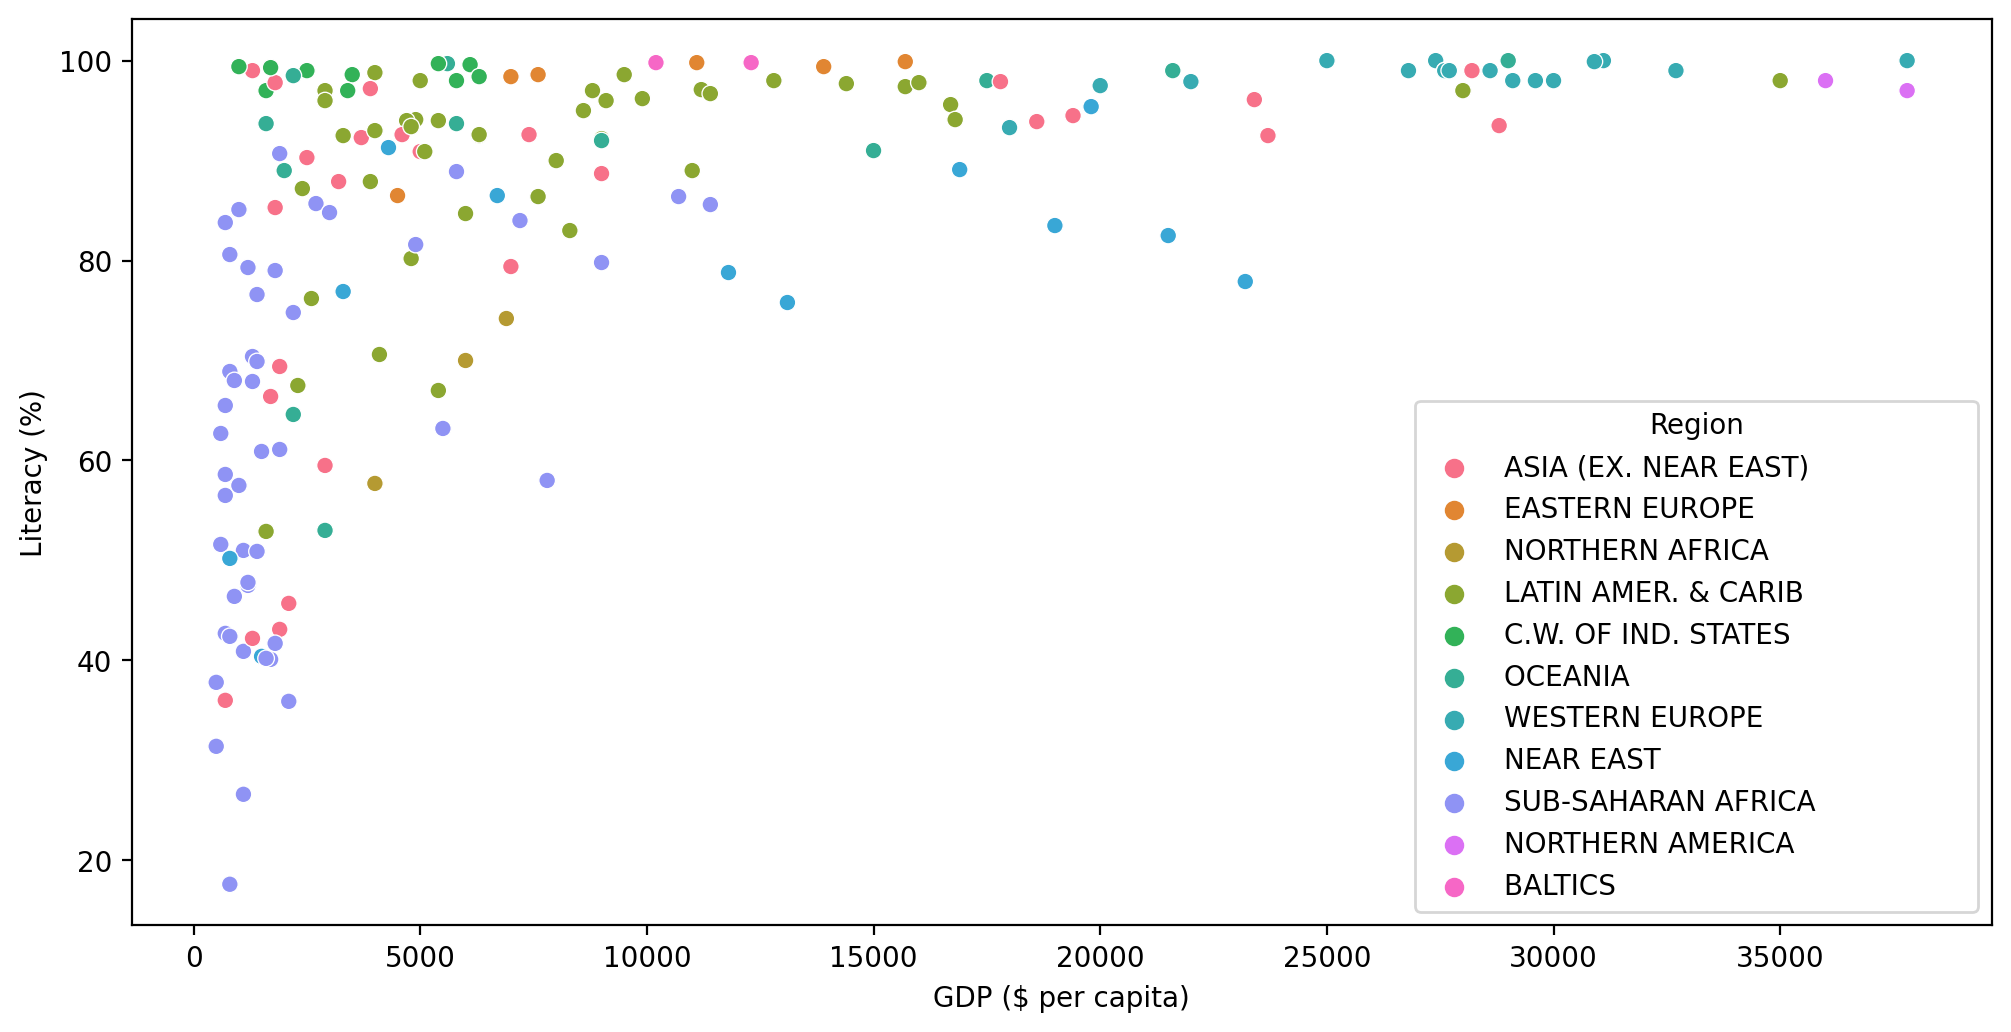

In [12]:
#CODE HERE
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue="Region")

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

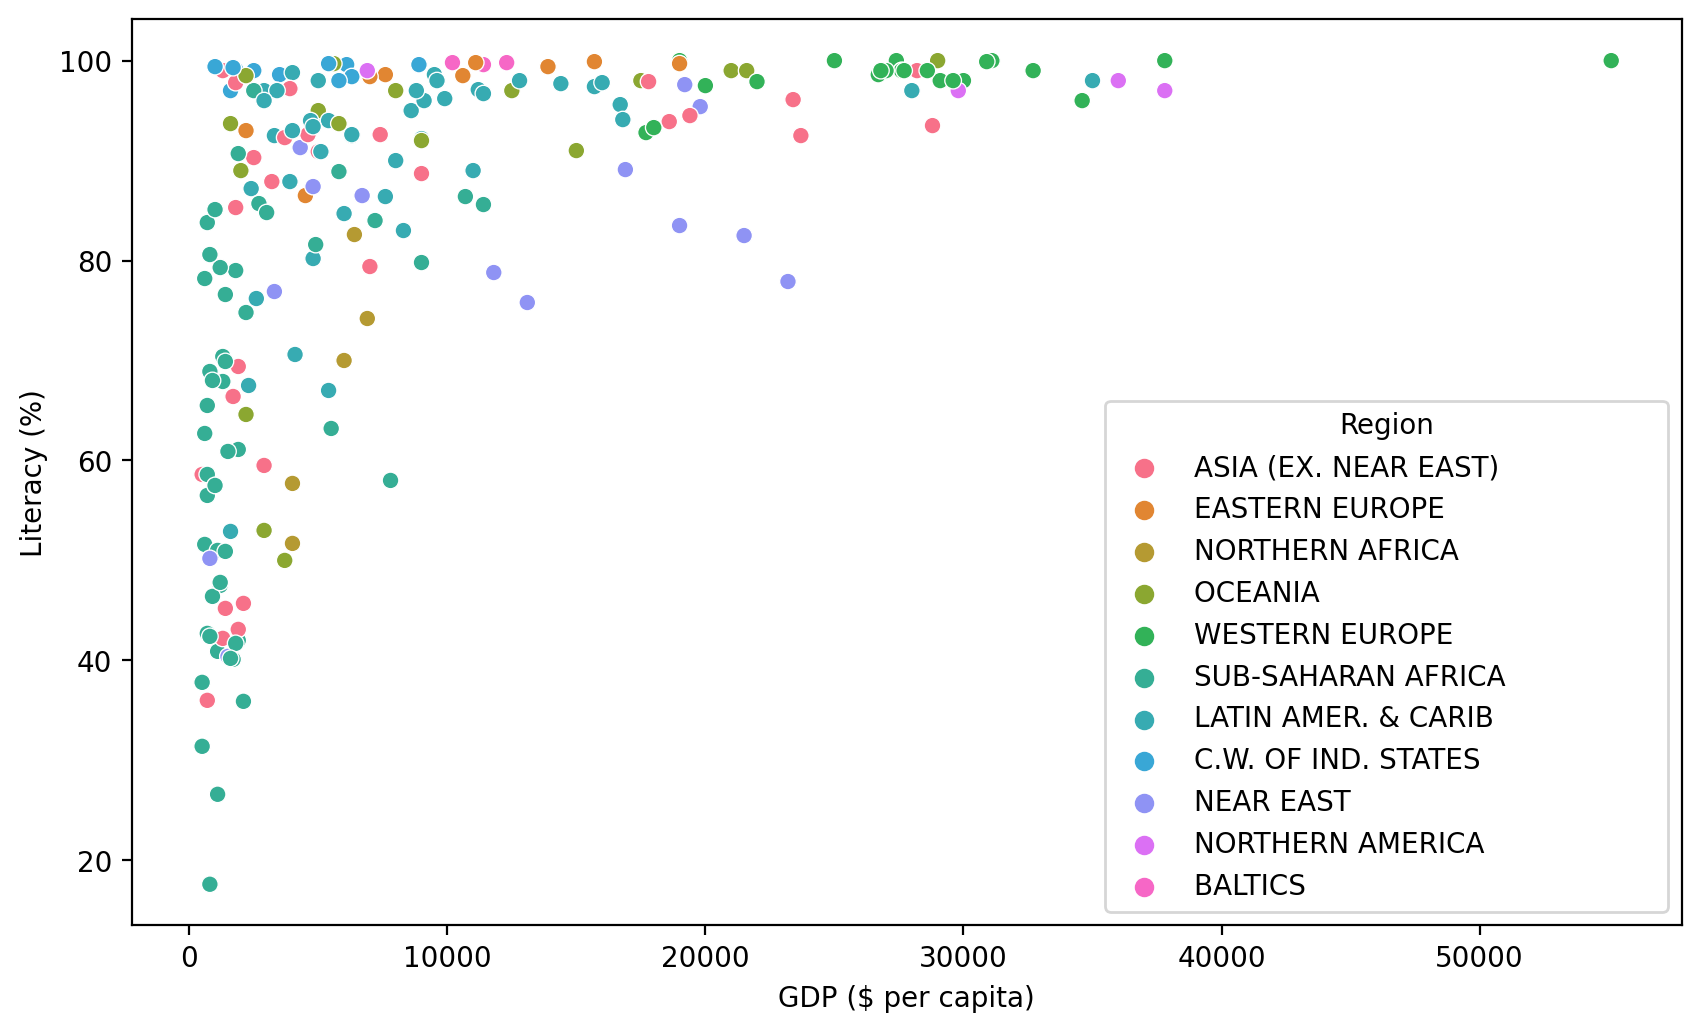

**TASK: Create a Heatmap of the Correlation between columns in the DataFrame.**

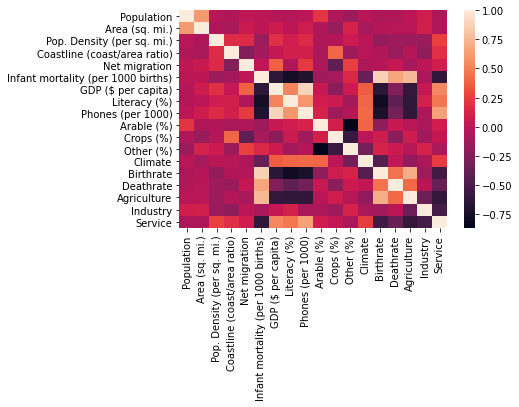

In [14]:
#CODE HERE
sns.heatmap(df.corr());

<AxesSubplot:>

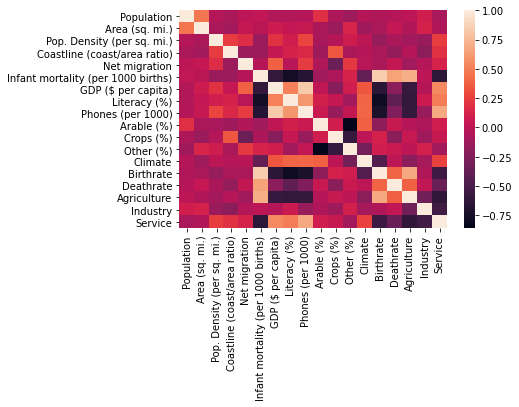

**TASK: Seaborn can auto perform hierarchal clustering through the clustermap() function. Create a clustermap of the correlations between each column with this function.**

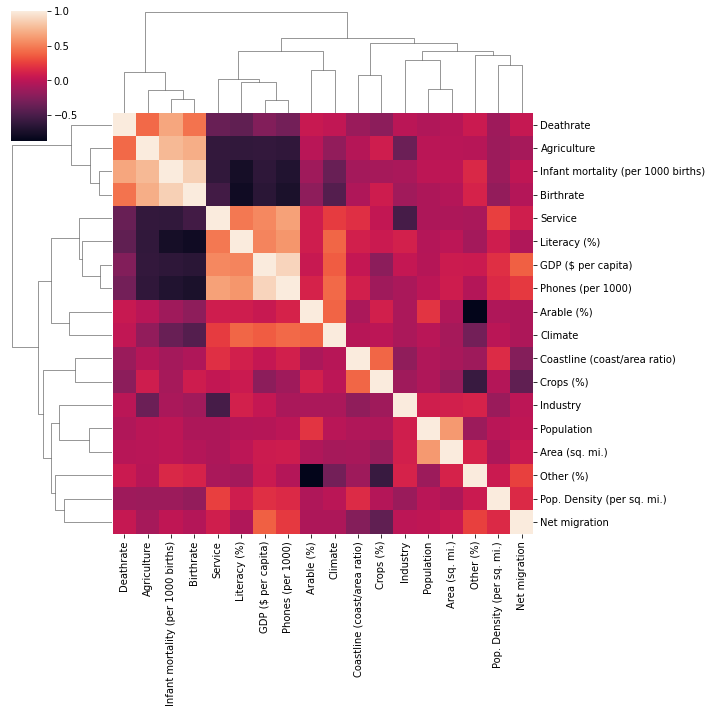

In [15]:
# CODE HERE
sns.clustermap(df.corr());

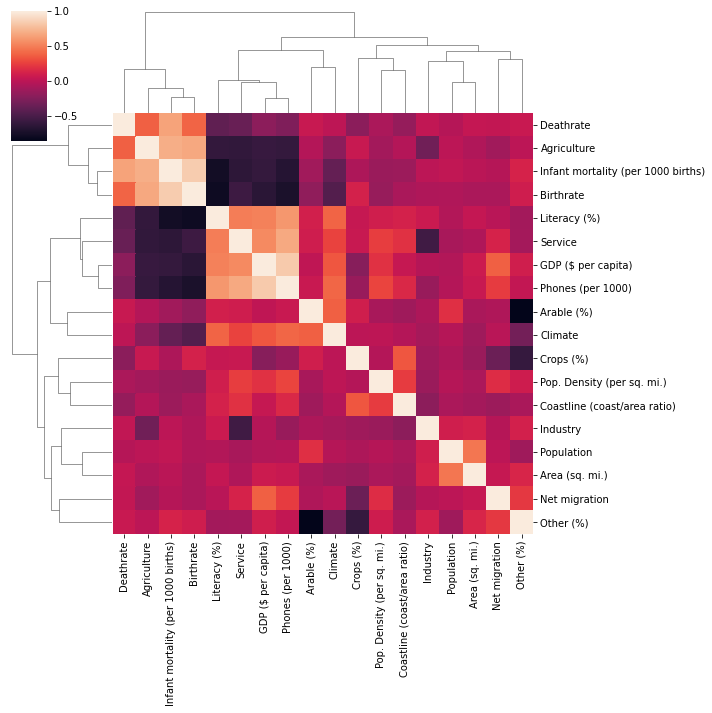

-----

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data

**TASK: Report the number of missing elements per column.**

In [90]:
#CODE HERE
df = pd.read_csv('data/CIA_Country_Facts.csv')
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [91]:
df[df.isna()['Agriculture']]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**TASK: You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant. There should be 15 countries in total you do this for. For a hint on how to do this, recall you can do the following:**

    df[df['feature'].isnull()]
    

In [95]:
df[df['Agriculture'].isnull()].transform(lambda x: x.fillna(0))

Country                               Region  Population  \
3          American Samoa  OCEANIA                                   57794   
4                 Andorra  WESTERN EUROPE                            71201   
78              Gibraltar  WESTERN EUROPE                            27928   
80              Greenland  NORTHERN AMERICA                          56361   
83                   Guam  OCEANIA                                  171019   
134               Mayotte  SUB-SAHARAN AFRICA                       201234   
140            Montserrat              LATIN AMER. & CARIB            9439   
144                 Nauru  OCEANIA                                   13287   
153    N. Mariana Islands  OCEANIA                                   82459   
171          Saint Helena  SUB-SAHARAN AFRICA                         7502   
174  St Pierre & Miquelon  NORTHERN AMERICA                           7026   
177            San Marino  WESTERN EUROPE                            29251   
208     Turks & Caicos Is              LATIN AMER. & CARIB           21152   
221     Wallis and Futuna  OCEANIA                                   16025   
223        Western Sahara  NORTHERN AFRICA                          273008   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
78                7                      3989.7                        171.43   
80          2166086                         0.0                          2.04   
83              541                       316.1                         23.20   
134             374                       538.1                         49.52   
140             102                        92.5                         39.22   
144              21                       632.7                        142.86   
153             477                       172.9                        310.69   
171             413                        18.2                         14.53   
174             242                        29.0                         49.59   
177              61                       479.5                          0.00   
208             430                        49.2                         90.47   
221             274                        58.5                         47.08   
223          266000                         1.0                          0.42   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
78            0.00                                5.13             17500.0   
80           -8.37                               15.82             20000.0   
83            0.00                                6.94             21000.0   
134           6.78                               62.40              2600.0   
140           0.00                                7.35              3400.0   
144           0.00                                9.95              5000.0   
153           9.61                                7.11             12500.0   
171           0.00                               19.00              2500.0   
174          -4.86                                7.54              6900.0   
177          10.98                                5.73             34600.0   
208          11.68                               15.67              9600.0   
221           0.00                                0.00              3700.0   
223           0.00                                0.00                 0.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
3            97.0              259.5       10.00      15.00      75.00   
4           100.0              497.2        2.22       0.00      97.78   
7

**TASK: Now check to see what is still missing by counting number of missing elements again per feature:**

In [81]:
#CODE HERE
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [83]:
# CODE HERE
df['Climate'] = df.groupby('Region').transform(lambda x: x.fillna(x.mean()))

/tmp/ipykernel_13745/634829360.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['Climate'] = df.groupby('Region').transform(lambda x: x.fillna(x.mean()))


ValueError: Columns must be same length as key

**TASK: Check again on many elements are missing:**

In [729]:
#CODE HERE
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: It looks like Literacy percentage is missing. Use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [731]:
#CODE HERE

Country                               Region  Population  \
25   Bosnia & Herzegovina  EASTERN EUROPE                          4498976   
66          Faroe Islands  WESTERN EUROPE                            47246   
74             Gaza Strip  NEAR EAST                               1428757   
85               Guernsey  WESTERN EUROPE                            65409   
99            Isle of Man  WESTERN EUROPE                            75441   
104                Jersey  WESTERN EUROPE                            91084   
108              Kiribati  OCEANIA                                  105432   
123             Macedonia  EASTERN EUROPE                          2050554   
185              Slovakia  EASTERN EUROPE                          5439448   
187       Solomon Islands  OCEANIA                                  552438   
209                Tuvalu  OCEANIA                                   11810   
220        Virgin Islands              LATIN AMER. & CARIB          108605   
222             West Bank  NEAR EAST                               2460492   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
25            51129                        88.0                          0.04   
66             1399                        33.8                         79.84   
74              360                      3968.8                         11.11   
85               78                       838.6                         64.10   
99              572                       131.9                         27.97   
104             116                       785.2                         60.34   
108             811                       130.0                        140.94   
123           25333                        80.9                          0.00   
185           48845                       111.4                          0.00   
187           28450                        19.4                         18.67   
209              26                       454.2                         92.31   
220            1910                        56.9                          9.84   
222            5860                       419.9                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
25            0.31                               21.05              6100.0   
66            1.41                                6.24             22000.0   
74            1.60                               22.93               600.0   
85            3.84                                4.71             20000.0   
99            5.36                                5.93             21000.0   
104           2.76                                5.24             24800.0   
108           0.00                               48.52               800.0   
123          -1.45                               10.09              6700.0   
185           0.30                                7.41             13300.0   
187           0.00                               21.29              1700.0   
209           0.00                               20.03              1100.0   
220          -8.94                                8.03             17200.0   
222           2.98                               19.62               800.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
25            NaN              215.4       13.60       2.96      83.44   
66            NaN              503.8        2.14       0.00      97.86   
74            NaN              244.3       28.95      21.05      50.00   
85            NaN              842.4         NaN        NaN        NaN   
99            NaN              676.0        9.00       0.00      91.00   
104           NaN              811.3        0.00       0.00     100.00   
108           NaN               42.7        2.74      50.68      46.58   
123           NaN              260.0       22.26       1.81      75.93   
185           NaN              

**TASK: Check again on the remaining missing values:**

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**TASK: Optional: We are now missing values for only a few countries. Go ahead and drop these countries OR feel free to fill in these last few remaining values with any preferred methodology. For simplicity, we will drop these.**

In [735]:
# CODE HERE

## Data Feature Preparation

**TASK: It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [737]:
#CODE HERE

**TASK: Now let's create the X array of features, the Region column is still categorical strings, use Pandas to create dummy variables from this column to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [739]:
#CODE HERE

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0    31056997          647500                        48.0   
1     3581655           28748                       124.6   
2    32930091         2381740                        13.8   
3       57794             199                       290.4   
4       71201             468                       152.1   

   Coastline (coast/area ratio)  Net migration  \
0                          0.00          23.06   
1                          1.26          -4.93   
2                          0.04          -0.39   
3                         58.29         -20.71   
4                          0.00           6.60   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   
1                               21.52              4500.0          86.5   
2                               31.00              6000.0          70.0   
3                                9.27              8000.0          97.0   
4                                4.05             19000.0         100.0   

   Phones (per 1000)  Arable (%)  ...  \
0                3.2       12.13  ...   
1               71.2       21.09  ...   
2               78.1        3.22  ...   
3              259.5       10.00  ...   
4              497.2        2.22  ...   

   Region_BALTICS                              Region_C.W. OF IND. STATES   \
0                                           0                            0   
1                                           0                            0   
2                                           0                            0   
3                                           0                            0   
4                                           0                            0   

   Region_EASTERN EUROPE                       Region_LATIN AMER. & CARIB      \
0                                           0                               0   
1                                           1                               0   
2                                           0                               0   
3                                           0                               0   
4                                           0                               0   

   Region_NEAR EAST                            \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Region_NORTHERN AFRICA                      \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   Region_NORTHERN AMERICA                     \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Region_OCEANIA                              \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   

   Region_SUB-SAHARAN AFRICA                   \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Region_WESTERN EUROPE                       
0                                           0  
1                                           0  
2                                           0  
3             

### Scaling

**TASK: Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use Sklearn to scale the X feature matrics.**

In [742]:
#CODE HERE

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Creating and Fitting Kmeans Model

**TASK: Use a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD. Optional: You may also want to create a bar plot showing the SSD difference from the previous cluster.**

In [746]:
#CODE HERE

Text(0, 0.5, ' Sum of Squared Distances')

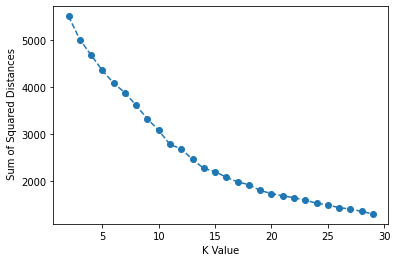

<AxesSubplot:>

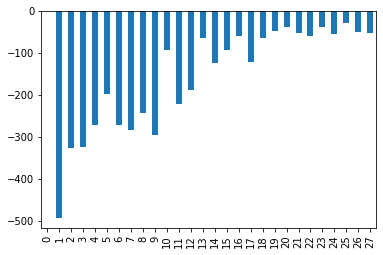

-----

# Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices. As this is unsupervised learning, there is no 100% correct answer here. Please feel free to jump to the solutions for a full discussion on this!.**

In [751]:
# Nothing to really code here, but choose a K value and see what features 
# are most correlated to belonging to a particular cluster!

# Remember, there is no 100% correct answer here!

-----


#### Example Interpretation: Choosing K=3

**One could say that there is a significant drop off in SSD difference at K=3 (although we can see it continues to drop off past this). What would an analysis look like for K=3? Let's explore which features are important in the decision of 3 clusters!**

KMeans(n_clusters=3)

array([2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2])

Literacy (%)                                 -0.419453
Region_LATIN AMER. & CARIB                   -0.377533
Region_OCEANIA                               -0.248224
Crops (%)                                    -0.245934
Phones (per 1000)                            -0.198737
Region_C.W. OF IND. STATES                   -0.193384
Region_NEAR EAST                             -0.179732
Coastline (coast/area ratio)                 -0.158318
Region_NORTHERN AFRICA                       -0.151646
Service                                      -0.117898
Population                                   -0.062404
GDP ($ per capita)                           -0.060568
Industry                                     -0.048420
Area (sq. mi.)                               -0.039735
Region_NORTHERN AMERICA                      -0.027789
Pop. Density (per sq. mi.)                    0.013816
Other (%)                                     0.016429
Climate                                       0.024573
Region_ASI

---